In [7]:
import pandas as pd
import numpy as np

# Generate sample data
dates = pd.date_range(start='2020-01-01', periods=365)
dates_str = dates.strftime('%Y%m%d').astype(str)

# Create synthetic temperature data
np.random.seed(0)
avg_temp = np.random.uniform(-50, 500, size=len(dates))  # in tenths of degrees Celsius

# Create DataFrame
data = {
    'Date': dates_str,
    'AvgTemp': avg_temp
}
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('temperature_data.csv', index=False, float_format='%.2f')
print('temperature_data.csv generated successfully.')


temperature_data.csv generated successfully.


Fitted parameters: [ 0.65086659 -0.62288688]
% delta less than 2: 5.714285714285714


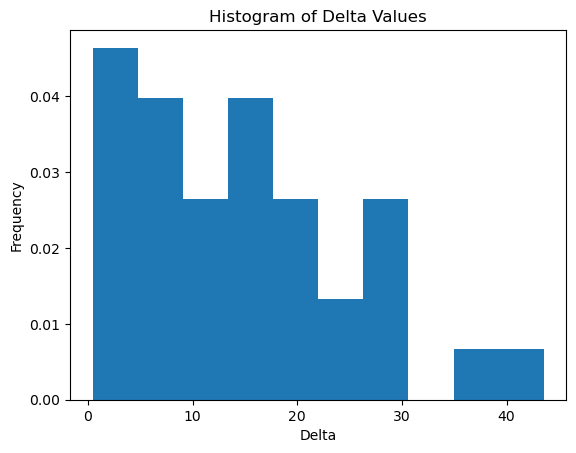

In [9]:
"""
Temperature Time Series Analysis Script
"""

import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

# Function to model the data
def model(p, ma1):
    c0, c1 = p
    return c0 + c1 * ma1

# Error function for least squares fitting
def error(p, t, ma1):
    return t - model(p, ma1)

# AR(2) model function
def ar(a):
    ar_p = [1.06517683, -0.08293789]
    return ar_p[0] * a[1:-1] + ar_p[1] * a[:-2]

def main(filename):
    """
    Main function to load temperature data and perform analysis.
    """
    # Load temperature data (in tenths of degrees Celsius)
    temp = 0.1 * np.loadtxt(filename, delimiter=',', usecols=(1,), skiprows=1, unpack=True)
    cutoff = int(0.9 * len(temp))

    # Initial parameters for least squares fitting
    p0 = [0.1, 0.1]

    # Calculate error terms using AR(2) model
    err_terms = temp[2:cutoff] - ar(temp[:cutoff])
    params = leastsq(error, p0, args=(err_terms[1:], err_terms[:-1]))[0]
    print("Fitted parameters:", params)

    # Calculate error terms for the test set
    err_terms = temp[cutoff+1:] - ar(temp[cutoff-1:])
    delta = np.abs(error(params, err_terms[1:], err_terms[:-1]))
    print("% delta less than 2:", (100.0 * len(delta[delta <= 2])) / len(delta))

    # Plot histogram of delta values
    plt.hist(delta, bins=10, density=True)
    plt.title('Histogram of Delta Values')
    plt.xlabel('Delta')
    plt.ylabel('Frequency')
    plt.show()

if __name__ == "__main__":
    if len(sys.argv) < 2:
        print("Usage: python temp_analysis.py <csv_file>")
    else:
        main('temperature_data.csv')


In [29]:
import pandas as pd
import numpy as np

# Generate sample data
dates = pd.date_range(start='2020-01-01', periods=365)
dates_str = dates.strftime('%Y%m%d').astype(str)

# Create synthetic temperature data
np.random.seed(0)
avg_temp = np.random.uniform(-50, 500, size=len(dates))  # in tenths of degrees Celsius

# Create DataFrame
data = {
    'Date': dates_str,
    'AvgTemp': avg_temp
}
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('temperature_data.csv', index=False, float_format='%.2f')
print('temperature_data.csv generated successfully.')


temperature_data.csv generated successfully.


Fitted polynomial coefficients: [-1.17568416e-05 -2.63761396e-03  2.30444824e+01]
% delta less than 2: 8.108108108108109


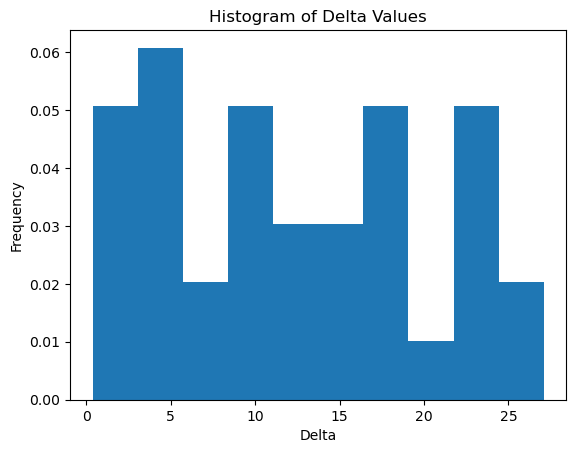

In [25]:
"""
Temperature Time Series Analysis Script
"""

import sys
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt

# Function to convert date to day of the year
to_dayofyear = lambda x: dt.strptime(x.decode('utf-8'), "%Y%m%d").timetuple().tm_yday
to_float = lambda x: float(x.decode('utf-8').strip())

def main(filename):
    """
    Main function to load temperature data and perform analysis.
    """
    # Load days and temperature data, skip the header row
    days, temp = np.loadtxt(
        filename, delimiter=',', usecols=(0, 1), unpack=True, converters={0: to_dayofyear, 1: to_float}, skiprows=1
    )
    
    # Convert temperature from tenths of degrees Celsius to degrees Celsius
    temp = 0.1 * temp
    cutoff = int(0.9 * len(temp))

    # Fit a 2nd degree polynomial to the data
    poly = np.polyfit(days[:cutoff], temp[:cutoff], 2)
    print("Fitted polynomial coefficients:", poly)

    # Calculate the delta for the test set
    delta = np.abs(np.polyval(poly, days[cutoff:]) - temp[cutoff:])
    print("% delta less than 2:", (100.0 * len(delta[delta <= 2])) / len(delta))

    # Plot histogram of delta values
    plt.hist(delta, bins=10, density=True)
    plt.title('Histogram of Delta Values')
    plt.xlabel('Delta')
    plt.ylabel('Frequency')
    plt.show()

if __name__ == "__main__":
    if len(sys.argv) < 2:
        print("Usage: python temp_analysis.py <csv_file>")
    else:
        main('temperature_data.csv')


In [15]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
from scipy.optimize import leastsq

# Function to convert date to day of the year
to_dayofyear = lambda x: dt.strptime(x.decode('utf-8'), "%Y%m%d").timetuple().tm_yday

def model(p, d):
    a, b, w, c = p
    return a + b * np.cos(w * d + c)

def error(p, d, t):
    return t - model(p, d)

def main(filename):
    # Load days and temperature data, skip the header row
    days, temp = np.loadtxt(
        filename, delimiter=',', usecols=(0, 1), unpack=True, converters={0: to_dayofyear, 1: lambda x: float(x)}, skiprows=1, dtype=str
    )
    
    # Convert temperature from tenths of degrees Celsius to degrees Celsius
    temp = 0.1 * temp.astype(float)

    # Initial parameters for least squares fitting
    p0 = [0.1, 1, 0.01, 0.01]
    params = leastsq(error, p0, args=(days, temp))[0]
    print("Fitted parameters:", params)
    
    rng = np.arange(1, 366)
    avgs = np.zeros(365)
    
    for i in rng:
        indices = np.where(days == i)
        if indices[0].size > 0:
            avgs[i - 1] = temp[indices].mean()
    
    plt.plot(avgs, label='Average Temperature')
    plt.plot(model(params, rng), label='Fitted Model')
    plt.xlabel('Day of Year')
    plt.ylabel('Temperature (°C)')
    plt.title('Temperature Model Fit')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    if len(sys.argv) < 2:
        print("Usage: python temp_analysis.py <csv_file>")
    else:
        main('temperature_data.csv')


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('float64'), dtype('<U6')) -> None

In [21]:
import pandas as pd
import numpy as np

# Generate sample data
dates = pd.date_range(start='2020-01-01', periods=365)
dates_str = dates.strftime('%Y%m%d').astype(str)

# Create synthetic temperature data
np.random.seed(0)
avg_temp = np.random.uniform(-50, 500, size=len(dates))  # in tenths of degrees Celsius

# Create DataFrame
data = {
    'Date': dates_str,
    'AvgTemp': avg_temp
}
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('temperature_data1.csv', index=False, float_format='%.2f')
print('temperature_data.csv generated successfully.')


temperature_data.csv generated successfully.


Fitted parameters: [ 1.64199772e+01  3.26129992e+01 -2.05845950e-04  4.92331242e+00]


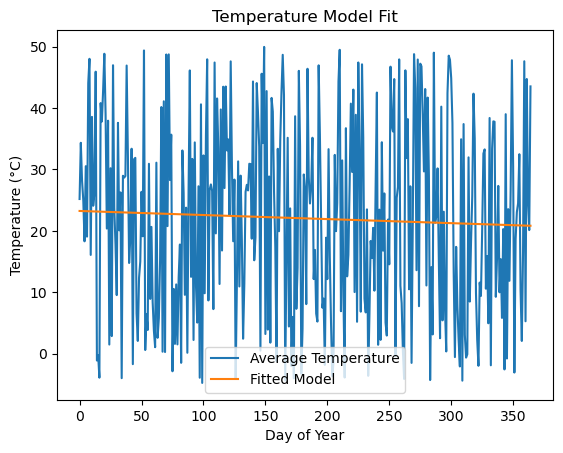

In [23]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
from scipy.optimize import leastsq

# Function to convert date to day of the year
to_dayofyear = lambda x: dt.strptime(x.decode('utf-8'), "%Y%m%d").timetuple().tm_yday

def model(p, d):
    a, b, w, c = p
    return a + b * np.cos(w * d + c)

def error(p, d, t):
    return t - model(p, d)

def main(filename):
    """
    Main function to load temperature data and perform analysis.
    """
    # Load days and temperature data, skip the header row
    days, temp = np.loadtxt(
        filename, delimiter=',', usecols=(0, 1), unpack=True, converters={0: to_dayofyear, 1: lambda x: float(x.decode('utf-8').strip())}, skiprows=1
    )
    
    # Convert temperature from tenths of degrees Celsius to degrees Celsius
    temp = 0.1 * temp

    # Initial parameters for least squares fitting
    p0 = [0.1, 1, 0.01, 0.01]
    params = leastsq(error, p0, args=(days, temp))[0]
    print("Fitted parameters:", params)
    
    rng = np.arange(1, 366)
    avgs = np.zeros(365)
    
    for i in rng:
        indices = np.where(days == i)
        if indices[0].size > 0:
            avgs[i - 1] = temp[indices].mean()
    
    plt.plot(avgs, label='Average Temperature')
    plt.plot(model(params, rng), label='Fitted Model')
    plt.xlabel('Day of Year')
    plt.ylabel('Temperature (°C)')
    plt.title('Temperature Model Fit')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    if len(sys.argv) < 2:
        print("Usage: python temp_analysis.py <csv_file>")
    else:
        main('temperature_data1.csv')


In [27]:
import pandas as pd
import numpy as np

# Generate sample data
dates = pd.date_range(start='2020-01-01', periods=365)
dates_str = dates.strftime('%Y%m%d').astype(str)

# Create synthetic data
np.random.seed(0)
avg_ws = np.random.uniform(0, 100, size=len(dates))  # in tenths of m/s
avg_temp = np.random.uniform(-50, 500, size=len(dates))  # in tenths of degrees Celsius
avg_pres = np.random.uniform(9500, 10500, size=len(dates))  # in tenths of hPa

# Create DataFrame
data = {
    'Date': dates_str,
    'AvgWindSpeed': avg_ws,
    'AvgTemp': avg_temp,
    'AvgPressure': avg_pres
}
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('temperature_data3.csv', index=False, float_format='%.2f')
print('temperature_data.csv generated successfully.')


temperature_data.csv generated successfully.


In [37]:
import pandas as pd
import sys
import numpy as np
from datetime import datetime as dt

# Converters
to_float = lambda x: .1 * float(x.strip() or np.nan)
to_date = lambda x: dt.strptime(x, "%Y%m%d")

# Columns to use
cols = ['Date', 'AvgWindSpeed', 'AvgTemp', 'AvgPressure']

# Conversion dictionary
conv_dict = {'AvgWindSpeed': to_float, 'AvgTemp': to_float, 'AvgPressure': to_float, 'Date': to_date}

def main(filename):
    try:
        # Read CSV
        df = pd.read_csv(filename, usecols=cols, converters=conv_dict)

        # Set the 'Date' column as the index
        df.set_index('Date', inplace=True)

        # Display first few rows
        print(df.head())
        print()

        # Display last few rows
        print(df.tail())
        print()

        # Descriptive statistics
        print(df.describe())
        print()

        # Correlation matrix
        print(df.corr())
        print()
    except Exception as e:
        print(f"Error: {e}")

if __name__ == "__main__":
    if len(sys.argv) < 2:
        print("Usage: python data_analysis.py <csv_file>")
    else:
        main('temperature_data3.csv')


            AvgWindSpeed  AvgTemp  AvgPressure
Date                                          
2020-01-01         5.488   20.223     1000.106
2020-01-02         7.152   34.829      987.639
2020-01-03         6.028   16.946      986.491
2020-01-04         5.449   44.722      976.090
2020-01-05         4.237   32.951      999.597

            AvgWindSpeed  AvgTemp  AvgPressure
Date                                          
2020-12-26         1.871   43.310      985.422
2020-12-27         9.040   32.993      962.028
2020-12-28         5.438   49.304     1025.490
2020-12-29         4.569   36.761     1038.502
2020-12-30         8.820   15.050      960.025

       AvgWindSpeed     AvgTemp  AvgPressure
count    365.000000  365.000000   365.000000
mean       4.916425   22.339088   999.363203
std        2.891993   16.250730    29.353486
min        0.047000   -4.851000   950.055000
25%        2.408000    8.663000   974.489000
50%        5.013000   20.147000   998.339000
75%        7.253000   35.

In [39]:
import pandas as pd
import numpy as np

# Generate sample data
dates = pd.date_range(start='2020-01-01', periods=365)
dates_str = dates.strftime('%Y%m%d').astype(str)

# Create synthetic temperature data
np.random.seed(0)
avg_temp = np.random.uniform(-50, 500, size=len(dates))  # in tenths of degrees Celsius

# Create DataFrame
data = {
    'Date': dates_str,
    'AvgTemp': avg_temp
}
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('temperature_data4.csv', index=False, float_format='%.2f')
print('temperature_data.csv generated successfully.')


temperature_data.csv generated successfully.


Polynomial coefficients: [-1.17568416e-05 -2.63761396e-03  2.30444824e+01]


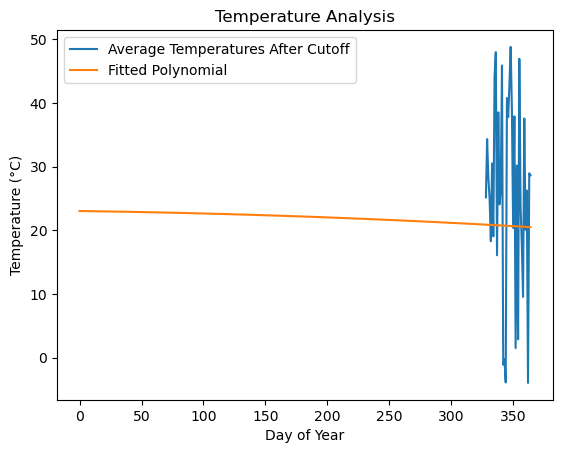

In [41]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt

def to_dayofyear(x):
    return dt.strptime(x.decode('utf-8'), "%Y%m%d").timetuple().tm_yday

def main(filename):
    try:
        days, temp = np.loadtxt(
            filename, delimiter=',', usecols=(0, 1), unpack=True, converters={0: to_dayofyear, 1: lambda x: float(x) * 0.1}, skiprows=1
        )

        cutoff = int(0.9 * len(temp))
        rng = np.arange(1, 366)
        avgs = np.zeros(365)
        avgs2 = np.zeros(365)

        for i in rng:
            indices = np.where(days[:cutoff] == i)
            avgs[i-1] = temp[indices].mean() if len(indices[0]) > 0 else np.nan
            indices = np.where(days[cutoff:] == i)
            avgs2[i-1] = temp[indices].mean() if len(indices[0]) > 0 else np.nan

        poly = np.polyfit(rng[~np.isnan(avgs)], avgs[~np.isnan(avgs)], 2)
        print("Polynomial coefficients:", poly)

        plt.plot(avgs2, label='Average Temperatures After Cutoff')
        plt.plot(np.polyval(poly, rng), label='Fitted Polynomial')
        plt.xlabel('Day of Year')
        plt.ylabel('Temperature (°C)')
        plt.title('Temperature Analysis')
        plt.legend()
        plt.show()
    except Exception as e:
        print(f"Error: {e}")

if __name__ == "__main__":
    if len(sys.argv) < 2:
        print("Usage: python temp_analysis.py <csv_file>")
    else:
        main('temperature_data4.csv')



In [49]:
import pandas as pd
import numpy as np

# Generate sample data
dates = pd.date_range(start='2020-01-01', periods=365)
dates_str = dates.strftime('%Y%m%d').astype(str)

# Create synthetic temperature data
np.random.seed(0)
avg_temp = np.random.uniform(-50, 500, size=len(dates))  # in tenths of degrees Celsius

# Create DataFrame
data = {
    'Date': dates_str,
    'AvgTemp': avg_temp
}
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('temperature_data5.csv', index=False, float_format='%.2f')
print('temperature_data.csv generated successfully.')



temperature_data.csv generated successfully.


Degree 1 polynomial coefficients: [1.59270625e-02 2.18250455e+01]
# % < 1 degree delta: 2.78
# % < 2 degree delta: 8.33
# % < 3 degree delta: 16.67
Degree 2 polynomial coefficients: [ 4.58073703e-03 -1.88499769e-01  2.29313275e+01]
# % < 1 degree delta: 5.56
# % < 2 degree delta: 11.11
# % < 3 degree delta: 13.89
Degree 3 polynomial coefficients: [ 2.41262677e-04 -1.18367599e-02  7.32207654e-02  2.26458928e+01]
# % < 1 degree delta: 5.56
# % < 2 degree delta: 11.11
# % < 3 degree delta: 13.89


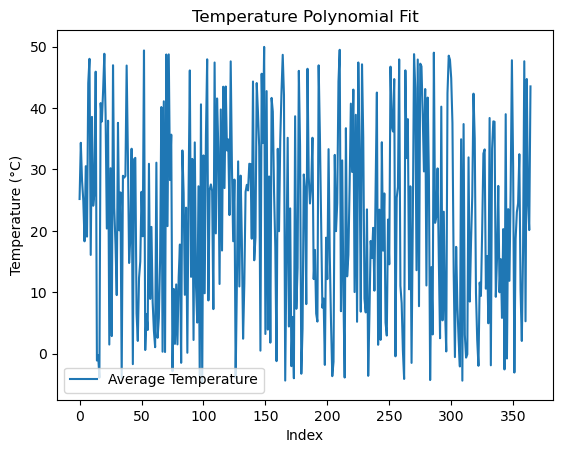

In [53]:
import sys
import numpy as np
import matplotlib.pyplot as plt

def main(filename):
    # Load average temperature data from the CSV file
    avg_temp = .1 * np.loadtxt(filename, delimiter=',', usecols=(1,), unpack=True, skiprows=1)
    cutoff = int(0.9 * len(avg_temp))
    
    fig = plt.figure()
    
    for degree in range(1, 4):
        poly = np.polyfit(avg_temp[:cutoff - 1], avg_temp[1:cutoff], degree)
        print(f"Degree {degree} polynomial coefficients:", poly)
        
        fit = np.polyval(poly, avg_temp[cutoff:-1])
        delta = np.abs(avg_temp[cutoff + 1:] - fit)
        
        for i in range(1, 4):
            percent_less_than_i = 100.0 * len(delta[delta < i]) / len(delta)
            print(f"# % < {i} degree delta: {percent_less_than_i:.2f}")
    
    plt.plot(avg_temp, label='Average Temperature')
    plt.xlabel('Index')
    plt.ylabel('Temperature (°C)')
    plt.title('Temperature Polynomial Fit')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    if len(sys.argv) < 2:
        print("Usage: python temp_analysis.py <csv_file>")
    else:
        main('temperature_data5.csv')


In [55]:
import pandas as pd
import numpy as np

# Generate sample data
dates = pd.date_range(start='2020-01-01', periods=365)
dates_str = dates.strftime('%Y%m%d').astype(str)

# Create synthetic temperature data
np.random.seed(0)
avg_temp = np.random.uniform(-50, 500, size=len(dates))  # in tenths of degrees Celsius

# Create DataFrame
data = {
    'Date': dates_str,
    'AvgTemp': avg_temp
}
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('temperature_data6.csv', index=False, float_format='%.2f')
print('temperature_data.csv generated successfully.')


temperature_data.csv generated successfully.


[0.49732732 0.33283214]


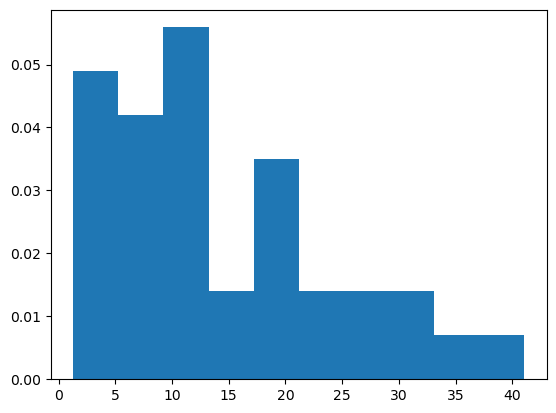

In [59]:
import sys
import numpy as np
import matplotlib.pyplot as plt

def main(filename):
    # Load average temperature data from the CSV file
    temp = .1 * np.loadtxt(filename, delimiter=',', usecols=(1,), unpack=True, skiprows=1)
    cutoff = int(0.9 * len(temp))
    A = np.zeros((2, cutoff - 2), float)
    
    A[0, :] = temp[:cutoff - 2]
    A[1, :] = temp[1:cutoff - 1]
    
    b = temp[2:cutoff]
    x, residuals, rank, s = np.linalg.lstsq(A.T, b, rcond=None)
    print(x)
    
    fit = x[0] * temp[cutoff-1:-2] + x[1] * temp[cutoff:-1]
    delta = np.abs(temp[cutoff + 1:] - fit)
    
    plt.hist(delta, bins=10, density=True)
    plt.show()

if __name__ == "__main__":
    if len(sys.argv) < 2:
        print("Usage: python temp_analysis.py <csv_file>")
    else:
        main('temperature_data6.csv')


In [61]:
import pandas as pd
import numpy as np

# Generate sample data
dates = pd.date_range(start='2020-01-01', periods=365)
dates_str = dates.strftime('%Y%m%d').astype(str)

# Create synthetic temperature data
np.random.seed(0)
avg_temp = np.random.uniform(-50, 500, size=len(dates))  # in tenths of degrees Celsius

# Create DataFrame
data = {
    'Date': dates_str,
    'AvgTemp': avg_temp
}
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('temperature_data6.csv', index=False, float_format='%.2f')
print('temperature_data.csv generated successfully.')


temperature_data.csv generated successfully.


Fitted parameters: [ 1.76065898e-01  1.17729762e-02 -1.74508217e-05  1.47360793e-03
  1.83737486e+01]


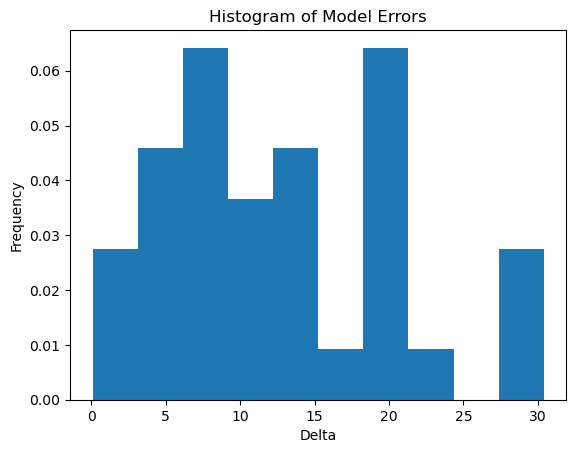

In [63]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
from scipy.optimize import leastsq

def to_dayofyear(x):
    return dt.strptime(x.decode('utf-8'), "%Y%m%d").timetuple().tm_yday

def error(p, d, t, lag2, lag1):
    l2, l1, d2, d1, d0 = p
    return t - (l2 * lag2 + l1 * lag1 + d2 * d ** 2 + d1 * d + d0)

def main(filename):
    days, temp = np.loadtxt(
        filename, delimiter=',', usecols=(0, 1), unpack=True, converters={0: to_dayofyear}, skiprows=1
    )
    temp = .1 * temp
    cutoff = int(0.9 * len(temp))

    p0 = [-0.08293789, 1.06517683, -4.91072584e-04, 1.92682505e-01, -3.97182941e+00]
    params = leastsq(error, p0, args=(days[2:cutoff], temp[2:cutoff], temp[:cutoff - 2], temp[1:cutoff - 1]))[0]
    print("Fitted parameters:", params)
    
    delta = np.abs(error(params, days[cutoff+1:], temp[cutoff+1:], temp[cutoff-1:-2], temp[cutoff:-1]))
    
    plt.hist(delta, bins=10, density=True)
    plt.xlabel('Delta')
    plt.ylabel('Frequency')
    plt.title('Histogram of Model Errors')
    plt.show()

if __name__ == "__main__":
    if len(sys.argv) < 2:
        print("Usage: python temp_analysis.py <csv_file>")
    else:
        main('temperature_data6.csv')


In [65]:
import pandas as pd
import numpy as np

# Generate sample data
dates = pd.date_range(start='2020-01-01', periods=365)
dates_str = dates.strftime('%Y%m%d').astype(str)

# Create synthetic temperature data
np.random.seed(0)
avg_temp = np.random.uniform(-50, 500, size=len(dates))  # in tenths of degrees Celsius

# Create DataFrame with 11 columns
data = {
    'Date': dates_str,
    'Col1': np.random.rand(len(dates)),
    'Col2': np.random.rand(len(dates)),
    'Col3': np.random.rand(len(dates)),
    'Col4': np.random.rand(len(dates)),
    'Col5': np.random.rand(len(dates)),
    'Col6': np.random.rand(len(dates)),
    'Col7': np.random.rand(len(dates)),
    'Col8': np.random.rand(len(dates)),
    'Col9': np.random.rand(len(dates)),
    'AvgTemp': avg_temp
}
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('temperature_data8.csv', index=False, float_format='%.2f')
print('temperature_data.csv generated successfully.')


temperature_data.csv generated successfully.


Fitted parameter: [0.0159282]
% delta less than 2: 8.333333333333334


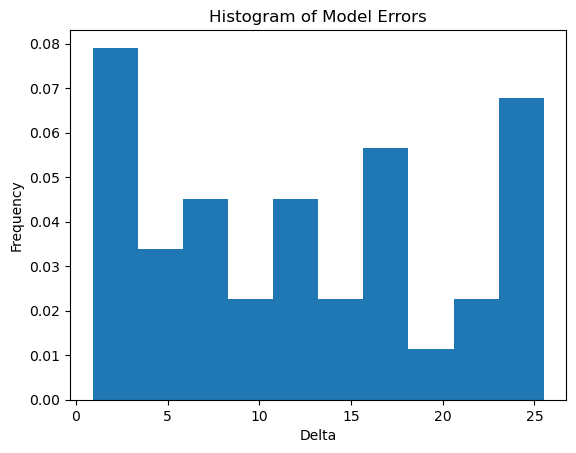

In [67]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

def main(filename):
    # Load average temperature data from the CSV file
    temp = .1 * np.loadtxt(filename, delimiter=',', usecols=(10,), unpack=True, skiprows=1)  # Column index 10 for AvgTemp
    cutoff = int(0.9 * len(temp))
    
    def model(p, ma1):
        return p * ma1
    
    def error(p, t, ma1):
        return t - model(p, ma1)
    
    p0 = [.9]
    mu = temp[:cutoff].mean()
    params = leastsq(error, p0, args=(temp[1:cutoff] - mu, temp[:cutoff-1] - mu))[0]
    print("Fitted parameter:", params)
    
    delta = np.abs(error(params, temp[cutoff+1:] - mu, temp[cutoff:-1] - mu))
    print("% delta less than 2:", (100. * len(delta[delta <= 2])) / len(delta))
    
    plt.hist(delta, bins=10, density=True)
    plt.xlabel('Delta')
    plt.ylabel('Frequency')
    plt.title('Histogram of Model Errors')
    plt.show()

if __name__ == "__main__":
    if len(sys.argv) < 2:
        print("Usage: python temp_analysis.py <csv_file>")
    else:
        main('temperature_data8.csv')


In [69]:
import pandas as pd
import numpy as np

# Generate sample data
dates = pd.date_range(start='2020-01-01', periods=365)
dates_str = dates.strftime('%Y%m%d').astype(str)

# Create synthetic temperature data
np.random.seed(0)
avg_temp = np.random.uniform(-50, 500, size=len(dates))  # in tenths of degrees Celsius

# Create DataFrame with 12 columns
data = {
    'Date': dates_str,
    'Col1': np.random.rand(len(dates)),
    'Col2': np.random.rand(len(dates)),
    'Col3': np.random.rand(len(dates)),
    'Col4': np.random.rand(len(dates)),
    'Col5': np.random.rand(len(dates)),
    'Col6': np.random.rand(len(dates)),
    'Col7': np.random.rand(len(dates)),
    'Col8': np.random.rand(len(dates)),
    'Col9': np.random.rand(len(dates)),
    'Col10': np.random.rand(len(dates)),
    'AvgTemp': avg_temp
}
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('temperature_data9.csv', index=False, float_format='%.2f')
print('temperature_data.csv generated successfully.')


temperature_data.csv generated successfully.


1st Quartile: 8.246
3rd Quartile: 34.889
Std: 15.884114363762334 IRQ: 26.643
0
#Outliers: 0


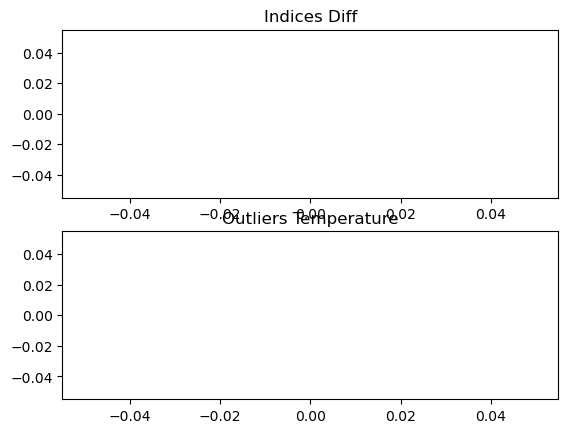

In [74]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import scoreatpercentile
from datetime import datetime as dt

def to_ordinal(x):
    return dt.strptime(x.decode('utf-8'), "%Y%m%d").toordinal()

def main(filename):
    ordinals, temp = np.loadtxt(
        filename, delimiter=',', usecols=(0, 11), unpack=True, converters={0: to_ordinal}, skiprows=1
    )
    temp = .1 * temp
    q1 = scoreatpercentile(temp, 25)
    print("1st Quartile:", q1)
    q3 = scoreatpercentile(temp, 75)
    print("3rd Quartile:", q3)
    irq = q3 - q1
    print("Std:", temp.std(), "IRQ:", irq)
    N = 1.5
    print(len(temp[temp > (q3 + N * irq)]))
    indices = np.where(temp < (q1 - N * irq))

    outliers = temp[indices]
    print("#Outliers:", len(outliers))
    plt.subplot(211)
    plt.plot(np.diff(indices)[0])
    plt.title('Indices Diff')
    plt.subplot(212)
    plt.title('Outliers Temperature')
    plt.plot(outliers)
    plt.show()

if __name__ == "__main__":
    if len(sys.argv) < 2:
        print("Usage: python temp_analysis.py <csv_file>")
    else:
        main('temperature_data9.csv')


In [76]:
import pandas as pd
import numpy as np

# Generate sample data
dates = pd.date_range(start='2020-01-01', periods=365)
dates_str = dates.strftime('%Y%m%d').astype(str)

# Create synthetic temperature data
np.random.seed(0)
avg_temp = np.random.uniform(-50, 500, size=len(dates))  # in tenths of degrees Celsius

# Create DataFrame with 12 columns
data = {
    'Date': dates_str,
    'Col1': np.random.rand(len(dates)),
    'Col2': np.random.rand(len(dates)),
    'Col3': np.random.rand(len(dates)),
    'Col4': np.random.rand(len(dates)),
    'Col5': np.random.rand(len(dates)),
    'Col6': np.random.rand(len(dates)),
    'Col7': np.random.rand(len(dates)),
    'Col8': np.random.rand(len(dates)),
    'Col9': np.random.rand(len(dates)),
    'Col10': np.random.rand(len(dates)),
    'AvgTemp': avg_temp
}
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('temperature_data10.csv', index=False, float_format='%.2f')
print('temperature_data.csv generated successfully.')


temperature_data.csv generated successfully.


/opt/homebrew/anaconda3/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1409: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


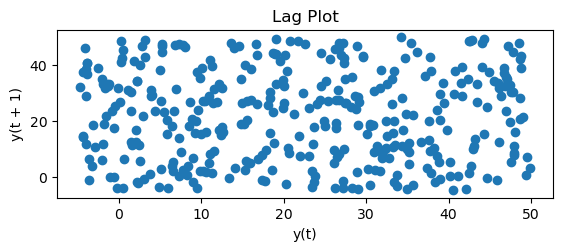

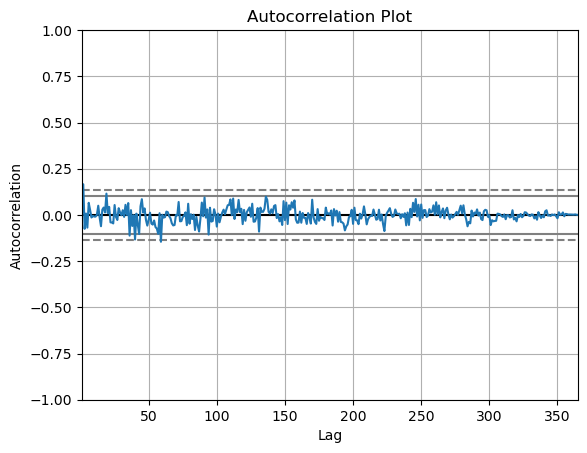

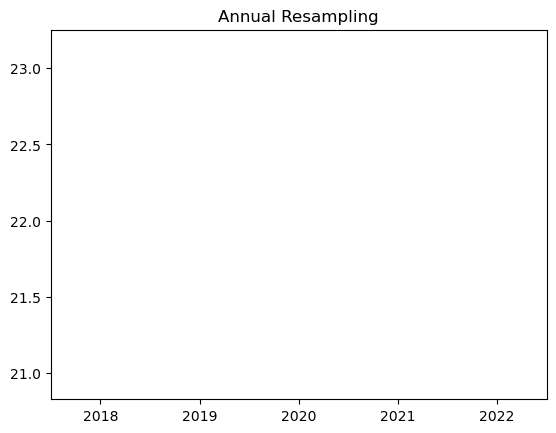

In [78]:
import numpy as np
import pandas as pd
import sys
from datetime import datetime as dt
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

# Define a function to convert dates to ordinal format
def to_date(x):
    return dt.strptime(x.decode('utf-8'), "%Y%m%d").toordinal()

def main(filename):
    # Load dates and average temperature data from the CSV file
    dates, avg_temp = np.loadtxt(filename, delimiter=',', usecols=(0, 11), unpack=True, converters={0: to_date}, skiprows=1)
    
    # Convert dates to DatetimeIndex
    dtidx = pd.DatetimeIndex([dt.fromordinal(int(date)) for date in dates])
    
    # Create a pandas Series with average temperature data
    data = pd.Series(avg_temp * .1, index=dtidx)
    
    # Plot lag plot
    fig = plt.figure()
    fig.add_subplot(211)
    lag_plot(data)
    plt.title('Lag Plot')
    
    # Plot autocorrelation
    plt.figure()
    autocorrelation_plot(data)
    plt.title('Autocorrelation Plot')
    
    # Plot resampled annual data
    plt.figure()
    resampled = data.resample('A').mean()
    resampled.plot()
    plt.title('Annual Resampling')
    plt.show()

if __name__ == "__main__":
    if len(sys.argv) < 2:
        print("Usage: python temp_analysis.py <csv_file>")
    else:
        main('temperature_data10.csv')


In [80]:
import pandas as pd
import numpy as np

# Generate sample data
dates = pd.date_range(start='2020-01-01', periods=365)
dates_str = dates.strftime('%Y%m%d').astype(str)

# Create synthetic temperature data
np.random.seed(0)
avg_temp = np.random.uniform(-50, 500, size=len(dates))  # in tenths of degrees Celsius
avg_ws = np.random.uniform(0, 30, size=len(dates))  # in tenths of m/s
avg_pres = np.random.uniform(980, 1050, size=len(dates))  # in tenths of hPa

# Create DataFrame with 12 columns
data = {
    'Date': dates_str,
    'Col1': np.random.rand(len(dates)),
    'Col2': np.random.rand(len(dates)),
    'Col3': np.random.rand(len(dates)),
    'Col4': np.random.rand(len(dates)),
    'Col5': np.random.rand(len(dates)),
    'Col6': np.random.rand(len(dates)),
    'Col7': np.random.rand(len(dates)),
    'Col8': np.random.rand(len(dates)),
    'Col9': np.random.rand(len(dates)),
    'Col10': np.random.rand(len(dates)),
    'AvgTemp': avg_temp,
    'AvgWS': avg_ws,
    'AvgPres': avg_pres
}
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('temperature_data11.csv', index=False, float_format='%.2f')
print('temperature_data.csv generated successfully.')


temperature_data.csv generated successfully.


In [94]:
import pandas as pd
import sys
import numpy as np
from datetime import datetime as dt
import yfinance as yf

def to_date(x):
    return dt.strptime(x, "%Y%m%d")

def main(filename):
    to_float = lambda x: .1 * float(x.strip() or np.nan)
    
    # Adjust column indices as per the CSV structure
    cols = [0, 1]
    conv_dict = {0: to_date, 1: to_float}

    headers = ['dates', 'avg_temp']
    df = pd.read_csv(filename, usecols=cols, names=headers, index_col=[0], converters=conv_dict, skiprows=1)
    
    # EWN start Mar 22, 1996
    start = dt(1996, 3, 22)
    end = dt(2013, 5, 4)

    symbol = "EWN"
    quotes = yf.download(symbol, start=start, end=end)

    # Create date time index
    dt_idx = pd.DatetimeIndex(quotes.index)

    # Create data frame
    df2 = pd.DataFrame(quotes['Close'], index=dt_idx, columns=[symbol])
    print(df2.head())

    df3 = df.join(df2)

    print(df3.corr())
    print()

if __name__ == "__main__":
    if len(sys.argv) < 2:
        print("Usage: python temp_analysis.py <csv_file>")
    else:
        main('temperature_data12.csv')


[*********************100%%**********************]  1 of 1 completed

            EWN
Date           
1996-03-22  NaN
1996-03-25  NaN
1996-03-26  NaN
1996-03-27  NaN
1996-03-28  NaN
          avg_temp  EWN
avg_temp       1.0  NaN
EWN            NaN  NaN



In [86]:
import pandas as pd
import numpy as np

# Generate sample data
dates = pd.date_range(start='2020-01-01', periods=365)
dates_str = dates.strftime('%Y%m%d').astype(str)

# Create synthetic temperature data
np.random.seed(0)
avg_temp = np.random.uniform(-50, 500, size=len(dates))  # in tenths of degrees Celsius

# Create DataFrame with necessary columns
data = {
    'Date': dates_str,
    'AvgTemp': avg_temp,
}
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('temperature_data12.csv', index=False, float_format='%.2f')
print('temperature_data.csv generated successfully.')



temperature_data.csv generated successfully.


In [110]:
import pandas as pd
import numpy as np

# Generate sample data
dates = pd.date_range(start='2020-01-01', periods=365)
dates_str = dates.strftime('%Y%m%d').astype(str)

# Create synthetic temperature data
np.random.seed(0)
avg_temp = np.random.uniform(-50, 500, size=len(dates))  # in tenths of degrees Celsius

# Create DataFrame with necessary columns
data = {
    'Date': dates_str,
    'AvgTemp': avg_temp,
}
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('temperature_data13.csv', index=False, float_format='%.2f')
print('temperature_data.csv generated successfully.')


temperature_data.csv generated successfully.


After Subtracting DOY avgs
Min 0.0 Max 0.0 Mean 0.0 Std 0.0

Trend coeff [0. 0.]
After Subtracting Linear Trend
Min 0.0 Max 0.0 Mean 0.0 Std 0.0

AR params [ 1.06517683 -0.08293789]
% delta less than 2 0.0


/var/folders/dv/3stz4zmn5jn1dhpcpw10k25h0000gp/T/ipykernel_5739/3213984203.py:30: RuntimeWarning: Mean of empty slice.
  avgs[i-1] = temp[indices].mean()
/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/dv/3stz4zmn5jn1dhpcpw10k25h0000gp/T/ipykernel_5739/3213984203.py:49: RankWarning: Polyfit may be poorly conditioned
  trend = np.polyfit(years[:cutoff], less_avgs, 1)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/matplotlib/axes/_axes.py:6826: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/opt/homebrew/anaconda3/lib/python3.11/site-packages/matplotlib/axes/_axes.py:6827: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

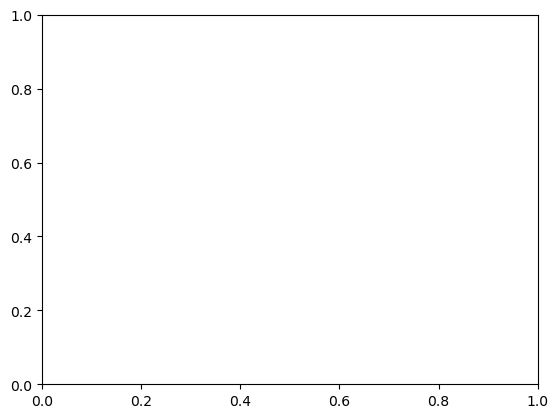

In [114]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
from scipy.optimize import leastsq

# Define conversion functions
def to_ordinal(x):
    return dt.strptime(x.decode('utf-8'), "%Y%m%d").toordinal()

# Load data
ordinals, temp = np.loadtxt('temperature_data13.csv', delimiter=',', usecols=(0, 1), unpack=True, converters={0: to_ordinal, 1: float}, skiprows=1)
days = np.array([dt.fromordinal(int(d)).timetuple().tm_yday for d in ordinals])
years = np.array([dt.fromordinal(int(d)).year for d in ordinals])
temp = .1 * temp

# Remove NaN values
valid_indices = ~np.isnan(temp)
ordinals = ordinals[valid_indices]
temp = temp[valid_indices]
days = days[valid_indices]
years = years[valid_indices]

cutoff = int(0.9 * len(temp))

# Calculate averages
avgs = np.zeros(366)
for i in range(1, 366):
    indices = np.where(days[:cutoff] == i)
    avgs[i-1] = temp[indices].mean()

# Define functions for subtracting averages and trends
def subtract_avgs(a, doy):
    return a - avgs[doy.astype(int)-1]

def subtract_trend(a, poly, b):
    return a - poly[0] * b - poly[1]

def print_stats(a):
    print("Min", a.min(), "Max", a.max(), "Mean", a.mean(), "Std", a.std())
    print()

# Step 1. DOY averages
less_avgs = subtract_avgs(temp[:cutoff], days[:cutoff])
print("After Subtracting DOY avgs")
print_stats(less_avgs)

# Step 2. Linear trend
trend = np.polyfit(years[:cutoff], less_avgs, 1)
print("Trend coeff", trend)
less_trend = subtract_trend(less_avgs, trend, years[:cutoff])
print("After Subtracting Linear Trend")
print_stats(less_trend)

# Define AR model functions
def model(p, lag2, lag1):
    l1, l2 = p
    return l2 * lag2 + l1 * lag1

def error(p, t, lag2, lag1):
    return t - model(p, lag2, lag1)

# Fit AR model
p0 = [1.06517683, -0.08293789]
params = leastsq(error, p0, args=(less_trend[2:], less_trend[:-2], less_trend[1:-1]))[0]
print("AR params", params)

# Step 1. again
less_avgs = subtract_avgs(temp[cutoff+1:], days[cutoff+1:])

# Step 2. again
less_trend = subtract_trend(less_avgs, trend, years[cutoff+1:])

# Calculate deltas and plot
delta = np.abs(error(params, less_trend[2:], less_trend[:-2], less_trend[1:-1]))
print("% delta less than 2", (100. * len(delta[delta <= 2]))/len(delta))

plt.hist(delta, bins=10, density=True)
plt.show()
